In [1]:
import pandas as pd

In [2]:
data_dtm = pd.read_pickle('dtm.pkl')
data_dtm_T = data_dtm.T
data_dtm_T

comedian,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,0,0,0,0,1,0,0,0,1,0,0,0
zombies,0,0,0,0,1,0,0,0,0,0,0,0
zoning,0,0,0,0,1,0,0,0,0,0,0,0
zoo,0,0,1,0,0,0,0,0,0,0,0,0


In [3]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data_dtm_T.columns:
    top = data_dtm_T[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'louis': [('like', 110),
  ('just', 97),
  ('know', 70),
  ('dont', 54),
  ('thats', 51),
  ('im', 51),
  ('youre', 50),
  ('life', 41),
  ('people', 40),
  ('thing', 31),
  ('hes', 29),
  ('gonna', 29),
  ('theres', 28),
  ('cause', 28),
  ('shit', 25),
  ('time', 23),
  ('tit', 22),
  ('good', 22),
  ('theyre', 21),
  ('right', 21),
  ('think', 21),
  ('really', 20),
  ('course', 19),
  ('kids', 19),
  ('guy', 18),
  ('murder', 18),
  ('ok', 17),
  ('didnt', 15),
  ('mean', 15),
  ('old', 15)],
 'dave': [('like', 103),
  ('know', 79),
  ('said', 63),
  ('just', 61),
  ('im', 47),
  ('shit', 46),
  ('people', 43),
  ('didnt', 39),
  ('ahah', 38),
  ('dont', 38),
  ('time', 36),
  ('fuck', 33),
  ('thats', 33),
  ('fucking', 32),
  ('black', 31),
  ('man', 30),
  ('good', 27),
  ('got', 27),
  ('right', 22),
  ('gonna', 21),
  ('lot', 20),
  ('nigga', 20),
  ('gay', 20),
  ('yeah', 19),
  ('did', 19),
  ('hes', 19),
  ('oh', 18),
  ('oj', 18),
  ('come', 17),
  ('guys', 16)],
 'ricky'

In [4]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---------------------------------------------------')

louis
like, just, know, dont, thats, im, youre, life, people, thing, hes, gonna, theres, cause
---------------------------------------------------
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---------------------------------------------------
ricky
right, like, just, im, dont, know, said, yeah, fucking, got, say, youre, went, id
---------------------------------------------------
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos
---------------------------------------------------
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---------------------------------------------------
jim
like, im, dont, right, fucking, know, went, just, youre, people, thats, oh, day, think
---------------------------------------------------
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---------------------------------------------------

In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data_dtm_T.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'know',
 'dont',
 'thats',
 'im',
 'youre',
 'life',
 'people',
 'thing',
 'hes',
 'gonna',
 'theres',
 'cause',
 'shit',
 'time',
 'tit',
 'good',
 'theyre',
 'right',
 'think',
 'really',
 'course',
 'kids',
 'guy',
 'murder',
 'ok',
 'didnt',
 'mean',
 'old',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'ahah',
 'dont',
 'time',
 'fuck',
 'thats',
 'fucking',
 'black',
 'man',
 'good',
 'got',
 'right',
 'gonna',
 'lot',
 'nigga',
 'gay',
 'yeah',
 'did',
 'hes',
 'oh',
 'oj',
 'come',
 'guys',
 'right',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'said',
 'yeah',
 'fucking',
 'got',
 'say',
 'youre',
 'went',
 'id',
 'thats',
 'people',
 'didnt',
 'little',
 'joke',
 'theyre',
 'hes',
 'ive',
 'thing',
 'going',
 'years',
 'day',
 'saying',
 'theres',
 'big',
 'hed',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'said',
 'eye',
 'people',
 'um

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('just', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('im', 12),
 ('people', 12),
 ('right', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('said', 7),
 ('yeah', 7),
 ('oh', 7),
 ('hes', 6),
 ('cause', 6),
 ('theyre', 6),
 ('fucking', 6),
 ('say', 6),
 ('going', 6),
 ('thing', 5),
 ('theres', 5),
 ('shit', 5),
 ('good', 5),
 ('didnt', 5),
 ('fuck', 5),
 ('day', 5),
 ('want', 5),
 ('really', 4),
 ('did', 4),
 ('little', 4),
 ('life', 3),
 ('man', 3),
 ('guys', 3),
 ('went', 3),
 ('ive', 3),
 ('dude', 3),
 ('kids', 2),
 ('guy', 2),
 ('ok', 2),
 ('mean', 2),
 ('old', 2),
 ('lot', 2),
 ('come', 2),
 ('id', 2),
 ('joke', 2),
 ('love', 2),
 ('make', 2),
 ('goes', 2),
 ('women', 2),
 ('hey', 2),
 ('mom', 2),
 ('dad', 2),
 ('real', 2),
 ('white', 2),
 ('school', 2),
 ('tell', 2),
 ('tit', 1),
 ('course', 1),
 ('murder', 1),
 ('ahah', 1),
 ('black', 1),
 ('nigga', 1),
 ('gay', 1),
 ('oj', 1),
 ('years', 1),
 ('saying', 1),
 ('big', 1),
 

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'just',
 'know',
 'dont',
 'thats',
 'im',
 'people',
 'right',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'said',
 'yeah',
 'oh']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('cleaned_corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


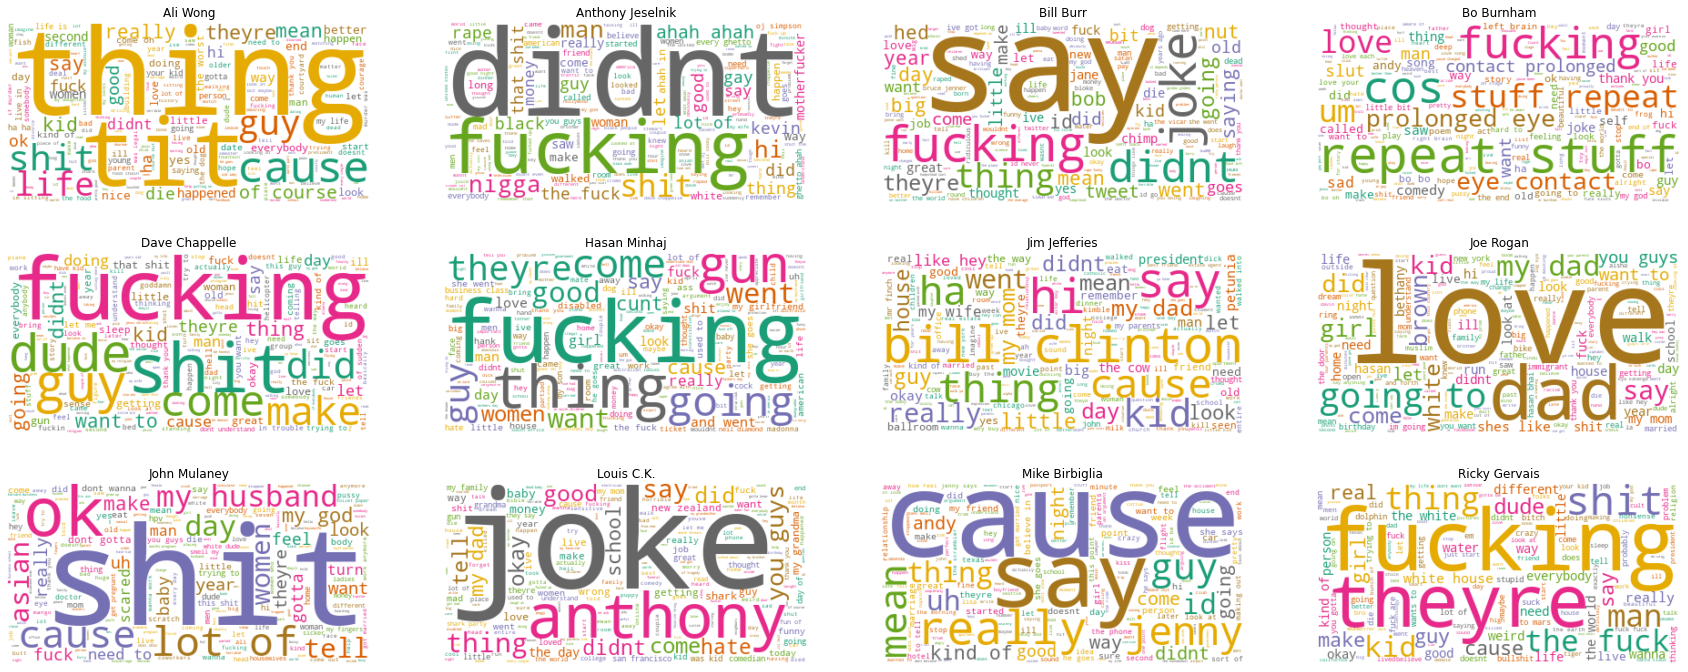

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 12]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data_dtm_T.columns):
    wc.generate(data_clean.transcripts[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Number of words

In [11]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data_dtm_T.columns:
    uniques = data_dtm_T[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
9,Louis C.K.,980
0,Ali Wong,1081
3,Bo Burnham,1272
5,Hasan Minhaj,1313
8,John Mulaney,1332
1,Anthony Jeselnik,1388
6,Jim Jefferies,1389
11,Ricky Gervais,1434
10,Mike Birbiglia,1486
7,Joe Rogan,1553


In [12]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data_dtm_T.columns:
    totals = sum(data_dtm_T[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
9,Louis C.K.,980,2904,58,50.068966
6,Jim Jefferies,1389,4001,77,51.961039
3,Bo Burnham,1272,3165,60,52.750000
8,John Mulaney,1332,3278,62,52.870968
0,Ali Wong,1081,3337,60,55.616667
11,Ricky Gervais,1434,4579,79,57.962025
2,Bill Burr,1630,4972,80,62.150000
10,Mike Birbiglia,1486,4744,76,62.421053
5,Hasan Minhaj,1313,4764,73,65.260274
1,Anthony Jeselnik,1388,4093,59,69.372881


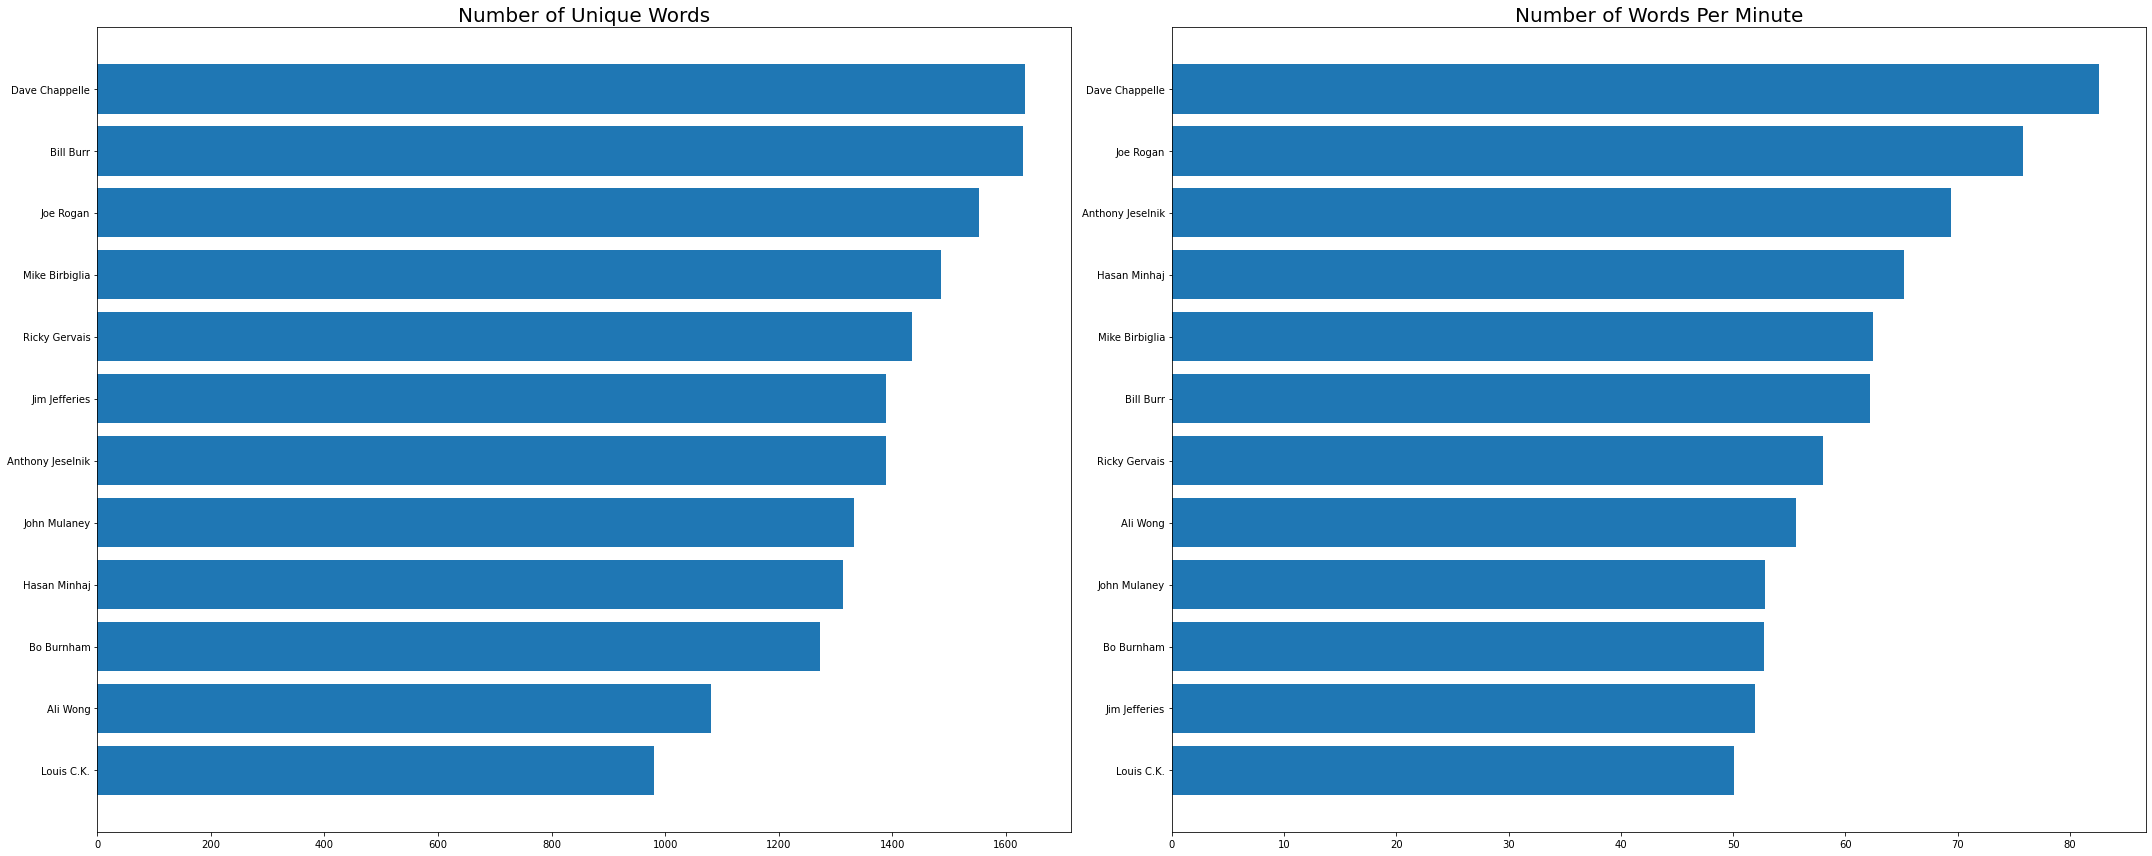

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [14]:
# Let's isolate just these bad words
data_bad_words = data_dtm_T.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
comedian,,
louis,21,25
dave,65,46
ricky,60,6
bo,37,6
bill,106,63
jim,115,20
john,4,6
hasan,24,15
ali,16,34


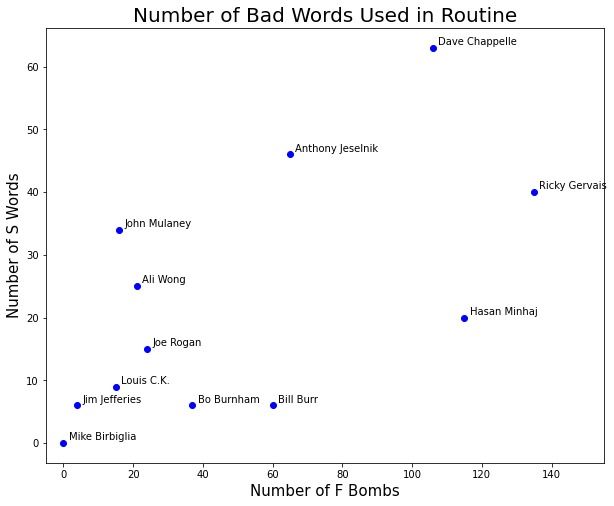

In [15]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()